## Chi-Square Test- 

The test is applied when you have two categorical variables from a single population. It is used to determine whether there is a significant association between the two variables.

In [1]:
import scipy.stats as stats

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [3]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
dataset = sns.load_dataset('tips')

In [5]:
dataset.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [13]:
dataset_table = pd.crosstab(dataset['sex'],dataset['smoker'])

In [14]:
dataset_table.values 

array([[60, 97],
       [33, 54]], dtype=int64)

In [25]:
#Observed Values
Observed_Values = dataset_table.values 
print("Observed Values :-\n",Observed_Values)

Observed Values :-
 [[60 97]
 [33 54]]


In [19]:
val = stats.chi2_contingency(dataset_table)

In [20]:
val

(0.008763290531773594,
 0.925417020494423,
 1,
 array([[59.84016393, 97.15983607],
        [33.15983607, 53.84016393]]))

In [22]:
Expected_Values=val[3]

Expected_Values

array([[59.84016393, 97.15983607],
       [33.15983607, 53.84016393]])

In [23]:
no_of_rows=len(dataset_table.iloc[0:2,0])
no_of_columns=len(dataset_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)
alpha = 0.05

Degree of Freedom:- 1


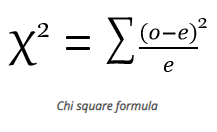

In [26]:
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]

In [28]:
print("chi-square statistic:-",chi_square_statistic)

chi-square statistic:- 0.001934818536627623


In [29]:
critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)

critical_value: 3.841458820694124


In [30]:
#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('p-value:',p_value)

p-value: 0.964915107315732
Significance level:  0.05
Degree of Freedom:  1
p-value: 0.964915107315732


In [31]:
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables


## T Test

A t-test is a type of inferential statistic which is used to determine if there is a significant difference between the means of two groups which may be related in certain features

T-test has 2 types : 1. one sampled t-test 2. two-sampled t-test.

##  One-sample T-test with Python

The test will tell us whether means of the sample and the population are different

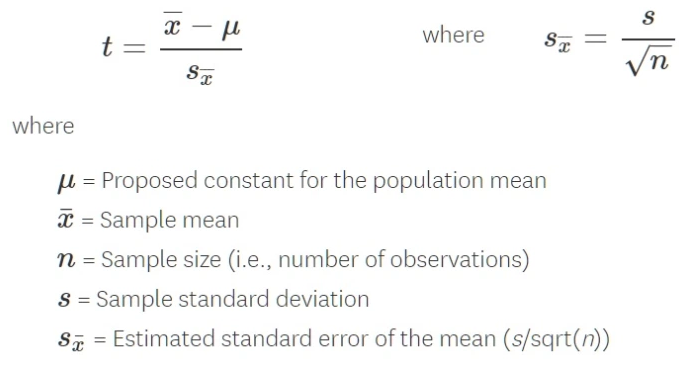

In [32]:
ages=[10,20,35,50,28,40,55,18,16,55,30,25,43,18,30,28,14,24,16,17,32,35,26,27,65,18,43,23,21,20,19,70]

In [33]:
len(ages)

32

In [35]:
import numpy as np
mean = np.mean(ages)
mean

30.34375

In [36]:
## Lets take sample

sample_size = 10
age_sample = np.random.choice(ages,sample_size)

In [37]:
age_sample

array([35, 28, 43, 70, 20, 30, 21, 16, 18, 28])

In [39]:
from scipy.stats import ttest_1samp

In [42]:
#ttest,p_value=ttest_1samp(age_sample,30)

ttest,p_values=ttest_1samp(age_sample,30)

In [43]:
print(p_value)

0.964915107315732


In [44]:
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

we are accepting null hypothesis


## Some More Examples
Consider the age of students in a college and in Class A

In [51]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import math
np.random.seed(6)
school_ages=stats.poisson.rvs(loc=18,mu=35,size=1500)
classA_ages=stats.poisson.rvs(loc=18,mu=30,size=60)


In [350]:
classA_ages.mean()

46.9

In [351]:
_,p_value=stats.ttest_1samp(a=classA_ages,popmean=school_ages.mean())

In [353]:
p_value

1.139027071016194e-13

In [352]:
school_ages.mean()

53.303333333333335

In [354]:
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

 we are rejecting null hypothesis


## Two-sample T-test With Python
The Independent Samples t Test or 2-sample t-test compares the means of two independent groups in order to determine whether there is statistical evidence that the associated population means are significantly different. The Independent Samples t Test is a parametric test. This test is also known as: Independent t Test

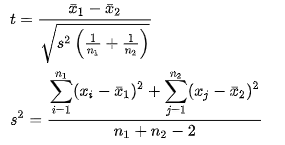

In [47]:
np.random.seed(12)
ClassB_ages=stats.poisson.rvs(loc=18,mu=33,size=60)
ClassB_ages.mean()

50.63333333333333

In [52]:
x,p_value=stats.ttest_ind(a=classA_ages,b=ClassB_ages,equal_var=False)

In [53]:
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

 we are rejecting null hypothesis


## Paired T-test With Python
When you want to check how different samples from the same group are, you can go for a paired T-test

In [54]:
weight1=[25,30,28,35,28,34,26,29,30,26,28,32,31,30,45]
weight2=weight1+stats.norm.rvs(scale=5,loc=-1.25,size=15)

In [55]:
print(weight1)
print(weight2)

[25, 30, 28, 35, 28, 34, 26, 29, 30, 26, 28, 32, 31, 30, 45]
[23.97614363 26.85249356 24.1373696  27.16615209 32.74902935 37.51232196
 18.81017209 33.31296285 30.20472761 25.47138779 21.60004812 34.32284878
 36.99043308 30.7551601  40.64860465]


In [56]:
weight_df=pd.DataFrame({"weight_10":np.array(weight1),
                         "weight_20":np.array(weight2),
                       "weight_change":np.array(weight2)-np.array(weight1)})

In [57]:
weight_df

,weight_10,weight_20,weight_change
0,25,23.976144,-1.023856
1,30,26.852494,-3.147506
2,28,24.137370,-3.862630
3,35,27.166152,-7.833848
4,28,32.749029,4.749029
5,34,37.512322,3.512322
6,26,18.810172,-7.189828
7,29,33.312963,4.312963
8,30,30.204728,0.204728
9,26,25.471388,-0.528612


In [58]:
_,p_value=stats.ttest_rel(a=weight1,b=weight2)

In [359]:
print(p_value)

0.5732936534411279


In [59]:
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

we are accepting null hypothesis


## Correlation

In [60]:
import seaborn as sns
df=sns.load_dataset('iris')

In [61]:
df.shape

(150, 5)

In [62]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


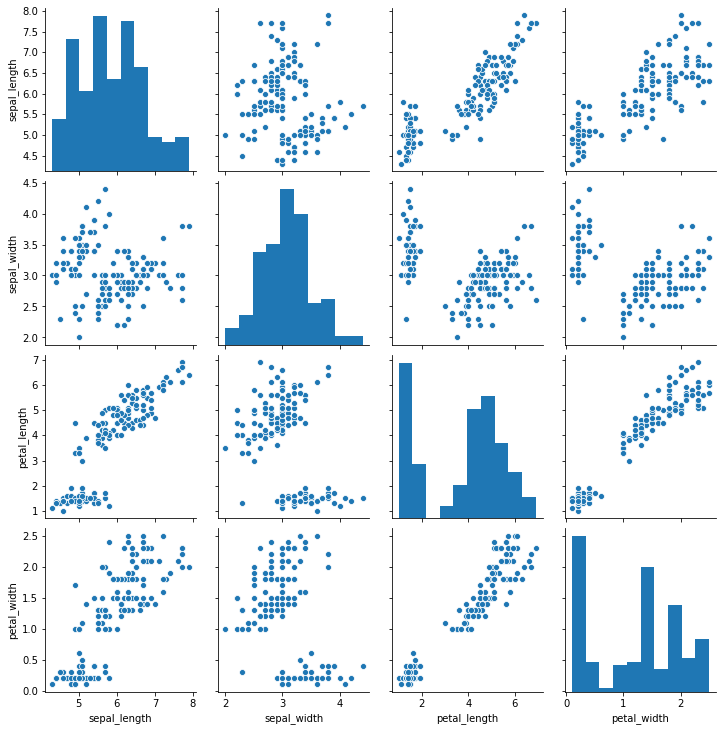

In [63]:
sns.pairplot(df)

## Anova Test(F-Test)
The t-test works well when dealing with two groups, but sometimes we want to compare more than two groups at the same time.


For example, if we wanted to test whether petal_width age differs based on some categorical variable like species, we have to compare the means of each level or group the variable

### One Way F-test(Anova) :-
It tell whether two or more groups are similar or not based on their mean similarity and f-score.

Example : there are 3 different category of iris flowers and their petal width and need to check whether all 3 group are similar or not 


In [64]:
import seaborn as sns
df1=sns.load_dataset('iris')

In [65]:
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [66]:
df_anova = df1[['petal_width','species']]

In [67]:
grps = pd.unique(df_anova.species.values)

In [68]:
grps

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [70]:
d_data = {i:df_anova['petal_width'][df_anova.species == i] for i in grps}

In [71]:
d_data = {i:df_anova['petal_width'][df_anova.species==i]for i in grps}

In [72]:
d_data

{'setosa': 0     0.2
 1     0.2
 2     0.2
 3     0.2
 4     0.2
 5     0.4
 6     0.3
 7     0.2
 8     0.2
 9     0.1
 10    0.2
 11    0.2
 12    0.1
 13    0.1
 14    0.2
 15    0.4
 16    0.4
 17    0.3
 18    0.3
 19    0.3
 20    0.2
 21    0.4
 22    0.2
 23    0.5
 24    0.2
 25    0.2
 26    0.4
 27    0.2
 28    0.2
 29    0.2
 30    0.2
 31    0.4
 32    0.1
 33    0.2
 34    0.2
 35    0.2
 36    0.2
 37    0.1
 38    0.2
 39    0.2
 40    0.3
 41    0.3
 42    0.2
 43    0.6
 44    0.4
 45    0.3
 46    0.2
 47    0.2
 48    0.2
 49    0.2
 Name: petal_width, dtype: float64,
 'versicolor': 50    1.4
 51    1.5
 52    1.5
 53    1.3
 54    1.5
 55    1.3
 56    1.6
 57    1.0
 58    1.3
 59    1.4
 60    1.0
 61    1.5
 62    1.0
 63    1.4
 64    1.3
 65    1.4
 66    1.5
 67    1.0
 68    1.5
 69    1.1
 70    1.8
 71    1.3
 72    1.5
 73    1.2
 74    1.3
 75    1.4
 76    1.4
 77    1.7
 78    1.5
 79    1.0
 80    1.1
 81    1.0
 82    1.2
 83    1.6
 84    1.5
 85  

In [73]:
F, p = stats.f_oneway(d_data['setosa'], d_data['versicolor'], d_data['virginica'])

In [74]:
print(p)

4.169445839443116e-85


In [75]:
if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

reject null hypothesis
